[7, 8, 8, 7, 7, 9, 12, 11, 12, 14, 14, 14, 13, 12, 12, 9, 10, 14, 14, 13, 15, 14, 13, 10]


/Users/salvadorruizcorrea/opt/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sinaica.inecc.gob.mx'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


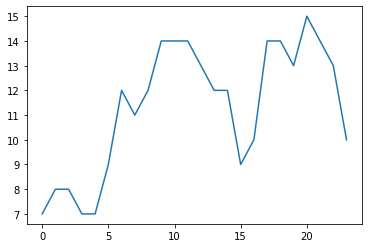

Estado: GTO: Red GTO: Estación Universidad Gto Sede Belen: Mean (between 10:00 and 15:00 h) = 12 (ug/m3).
Flow 15303: not used during the workshop.
Flow 15294: not used during the workshop.
Flow 14422: not used during the workshop.
Flow 14049: not used during the workshop.
Flow 13778: not used during the workshop.
Flow 13777: not used during the workshop.
Flow 13774: not used during the workshop.
Flow 13594: not used during the workshop.
Flow 13088: not used during the workshop.
Flow 13073: not used during the workshop.
Flow 13061: not used during the workshop.
Flow 13055: not used during the workshop.
Flow 13041: not used during the workshop.
Flow 15951: not used during the workshop.
Flow 15772: not used during the workshop.
Flow 15766: not used during the workshop.
Flow 15759: not used during the workshop.
Flow 15746: not used during the workshop.
Flow 15739: not used during the workshop.
Flow 15274: not used during the workshop.
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.95, 2.

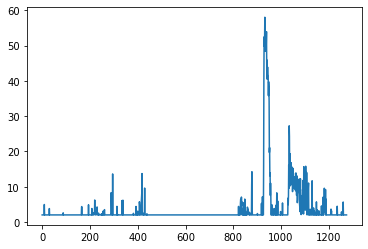

Flow 15263: PM2.5 average measurement = 3.6498117647058823 (ug/m3),PM2.5 max measurement = 58.06 (ug/m3).
Flow 15204: not used during the workshop.
Flow 15057: not used during the workshop.
Flow 14503: not used during the workshop.
Flow 13781: not used during the workshop.
Flow 13779: not used during the workshop.
[3.83, 3.45, 3.64, 3.76, 4.97, 5.49, 3.41, 4.58, 4.81, 4.06, 3.6, 3.97, 4.03, 4.27, 5.75, 5.5, 8.18, 39.01, 50.7, 52.53, 35.67, 33.13, 23.97, 8.01, 2.0, 2.0, 2.0, 7.97, 18.2, 26.66, 10.23, 11.42, 15.24, 11.1, 16.31, 8.75, 10.34, 17.7, 16.68, 13.57, 17.26, 17.75, None, 13.62, 7.73, 3.75, 3.61, 6.21, 3.07, 2.0, 2.35, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.32, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.67, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.28, 3.43, 2.76, 4.64, 5.66, 7.18, 2.97, 5.71, 5.18, 4.5, 2.0, 8.78, 4.55, 2.08, 2.08, 2.0, 5.01, 3.83, 4.69, 4.06, 6.96, 6.38, 4.49, 6.63, 5.86, 5.27, 5.56, 4

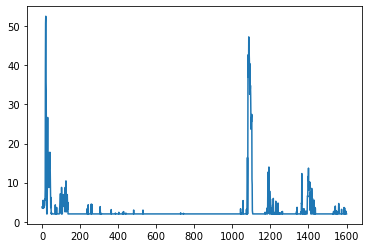

Flow 15070: PM2.5 average measurement = 3.0597064334790756 (ug/m3),PM2.5 max measurement = 52.53 (ug/m3).


In [11]:
# SenSky Workshops
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import json
import requests
from statistics import mean
import matplotlib.pyplot as plt



## Pollutants
pollutants = ["PM10", "PM2.5", "PM1", "VOC", "NO2"]


## SenSky workshop id
workshop = {"id:1", "date:11/29/2020"};

## SenSky workshop dates
workshop_date_sinaica = "2021-11-29" # YY-mm-day
workshop_start_date_flows = "11/29/2021 00:00:00" # UTC timestamps (10 digits long) defining the time range to be retrieved.
workshop_end_date_flows = "12/01/2021 00:00:00"

## SenSky sensor network #

# Personal monitors (Flows)
flows_ids = ["15303", "15294", "14422", "14049", "13778", "13777", "13774", "13594",
       "13088", "13073", "13061", "13055", "13041", "15951", "15772", "15766",
       "15759", "15746", "15739", "15274", "15263", "15204", "15057", "14503",
       "13781", "13779", "15070"];

url_pl = 'https://api.plumelabs.com/2.0/organizations/41/sensors/measures';
token_pl = "IlFkezrcU2Jvs5fm9oDLhSbn"; # Authorization token.
offset_pl = "0" # When offset is greater than 0, the first {offset} measures in the time range are discarded. Default value is 0

# Personal monitors (ipi_monitors)
ipi_monitors = {"1","2" };

# Portable monitoring statiosn (ipi_stations)
ipi_stations = {"1","2" };

# SINAICA network
url_sinaica = 'https://sinaica.inecc.gob.mx/pags/datGrafs.php';
sinaica_range_id = 1;
state_code = 'GTO';
network_code = 'GTO';


## SINAICA network
def read_sinaica_data():
    with open('sinaica_monitoring_stations.txt', 'r') as infile:
        return json.load(infile)
    
def get_network_monitoring_stations(state_code, network_code, monitoring_network_data):
    b_found = False;
    network_stations = [];
    for monitoring_network in monitoring_network_data:
        #print(monitoring_network["NAME"]);
        if monitoring_network["CODE"] == state_code:
            for network in monitoring_network["NETWORK"]:
                #print(network["NAME"]);
                if network["CODE"] == network_code:
                    network_stations = network["STATIONS"];
                    #print(network_stations);
                    b_found = True;
        if b_found:
            break
    return  network_stations;  

def get_stations_info(network_stations):
    stations_info = [];
    for station in network_stations:
        stations_info.append({"ID":station["ID"], "NAME": station["NAME"]});
    return stations_info;
           
def get_station_data_string(url_sinaica, station_id, param, ini_date, range_id):
    response = requests.post(url_sinaica, data={'estacionId': station_id, 'param': param, 'fechaIni': ini_date, 'rango': range_id }, verify=False)
    response.raise_for_status();  # raises exception when not a 2xx response
    raw_string = response.text;
    return raw_string;     

def parse_station_data_string(raw_string):
    strings = raw_string.split('\n');
    for string in strings:
        data_string = string.strip();
        if data_string.startswith('var dat ='):
            data_string = data_string.replace('var dat =',''); 
            data_string = data_string.replace(';','');
            values = json.loads(data_string);
            return values;
    values = [];
    return values;    

## Flows network

def compute_time_stamp(dt_str):
# Compute time stamps (data are recorded in UTC, no convesrion needed)
    format  = "%m/%d/%Y %H:%M:%S"
    dt = datetime.strptime(dt_str, format)
    time_stamp = calendar.timegm(dt.timetuple())
    return time_stamp;

def get_flow_data(url, sensor_id, token, start_date_time_stamp, end_date_time_stamp, offset):
    response = requests.get(url, \
                             params={'sensor_id': sensor_id,\
                                   'token': token,\
                                   'start_date': start_date_time_stamp,\
                                   'end_date': end_date_time_stamp,\
                                   'offset': offset });
    #print(response.url)
    response.raise_for_status();  # raises exception when not a 2xx response
    raw_string = json.loads(response.text);
    return raw_string;   

# Integrate SINAICA data  (monitoring stations ids)
monitoring_network_data = read_sinaica_data() 
network_stations = get_network_monitoring_stations(state_code, network_code, monitoring_network_data)
stations_info = get_stations_info(network_stations);
#print(stations_info); 

# Get pollutants data from SINAICA (PM2.5 for now, report average pollution betwen 10:00 and  15:00 h. for now)
for station_info in stations_info:
    raw_string = get_station_data_string(url_sinaica, station_info["ID"], pollutants[1], workshop_date_sinaica, sinaica_range_id);
    values = parse_station_data_string(raw_string);
    data = []
    for value in values:
        data.append(int(value["valor"]))
        
    print(data)
    plt.plot(data)
    plt.show()
    if len(data) > 0:
        #print("Estado: " + state_code + ": Red " + network_code + ": Estación " + station_info["NAME"], data)
        print("Estado: " + state_code + ": Red " + network_code + ": Estación " + station_info["NAME"] + ": Mean (between 10:00 and 15:00 h) = " + str(mean(data[10:17])) + " (ug/m3).")
    else:
        print("Warning:" + "Estado: " + state_code + ": Red " + network_code + ": Estación " + station_info["NAME"] + "  does not report " + pollutants[1] + " data.")
        
       
# Get pollutants from Flows network

for flow_id in flows_ids:
    #print(flow_id)
    start_date_time_stamp = compute_time_stamp(workshop_start_date_flows);
    end_date_time_stamp = compute_time_stamp(workshop_end_date_flows);
    response = get_flow_data(url_pl, flow_id, token_pl, start_date_time_stamp, end_date_time_stamp, offset_pl)
    #print(response["total"])
    if float(response["total"]) > 0:
        values = []; # PM2.5 for now
        for measures in response["measures"]:
            value = measures["pollutants"]["pm25"]["value"];
            values.append(value);
        print(values)    
        tmp = np.array(values)
        flag = pd.notnull(tmp)
        data = tmp[flag]
        
        val = np.convolve(np.array(data), np.ones(15), 'valid') / 15.
        plt.plot(data)
        plt.show()
        
        res = [i for i,v in enumerate(data) if v > 1] # Seems that  values smaller than 1 are spurious data
        #print(data[res])

        if len(data[res]) > 10 : # Need at least 10 mesurements
            data_mean = mean(data[res])
            print("Flow " + flow_id + ": PM2.5 average measurement = " + str(data_mean) + " (ug/m3)," +  "PM2.5 max measurement = " +  str(max(data[res])) + " (ug/m3).");
        else: 
            print("Flow " + flow_id + ": did not recorded accurate data.")
    else:          
        print("Flow " + flow_id + ": not used during the workshop.")    
            



In [8]:
import numpy as np
import pandas as pd
data = [1,2,3,4,None,6]
print(data)
dat = np.array(data)
flag= pd.notnull(dat)
dat[flag]
print(dat[flag])




[1, 2, 3, 4, None, 6]
[1 2 3 4 6]


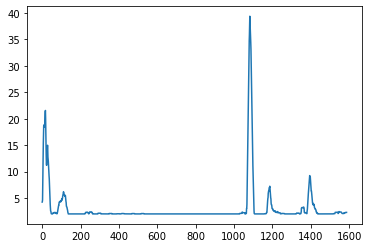

In [9]:
plt.plot(val)
plt.show()

In [10]:
3


3